In [1]:
import keras
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
len(train_data), len(test_data)

(8982, 2246)

### Encoding data

In [5]:
def vectorize_sequences(sequences, dimension):
    result = np.zeros((len(sequences), dimension))
    for i, seq in (enumerate(sequences)):
        result[i, seq] = 1.
    return result

In [7]:
x_train, x_test = vectorize_sequences(train_data, 10000), vectorize_sequences(test_data, 10000)

In [8]:
x_train[0], len(x_train[0])

(array([0., 1., 1., ..., 0., 0., 0.]), 10000)

### Encoding labels

In [9]:
y_train, y_test = vectorize_sequences(train_labels, 46), vectorize_sequences(test_labels, 46)

#### OR

In [10]:
from keras.utils import to_categorical

In [11]:
y_train, y_test = to_categorical(train_labels), to_categorical(test_labels)

In [12]:
y_train[0], len(y_train[0])

(array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 46)

### Network Architecture

In [13]:
from keras import models
from keras import layers

In [14]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [15]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
x_val, partial_x_train = x_train[:1000], x_train[1000:]
y_val, partial_y_train = y_train[:1000], y_train[1000:]

In [17]:
history = model.fit(partial_x_train,
         partial_y_train,
         batch_size=512,
         epochs=20,
         validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 132us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 113us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 111us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 106us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 109us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 110us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 112us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


### Plotting Loss

In [18]:
import matplotlib.pyplot as plt

In [19]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

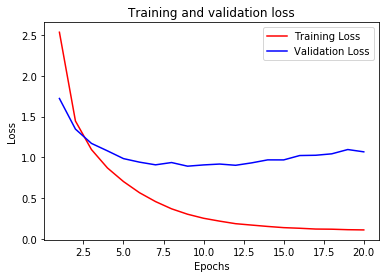

In [20]:
plt.plot(epochs, loss_values, 'r', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Plotting Accuracy

In [23]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1,len(acc_values)+1)

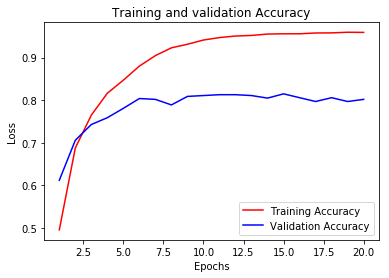

In [24]:
plt.plot(epochs, acc_values, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()